## THE FOLLOWING IS FEATURE ENGENEERING !!

Since cycling is a sport in which, on average for the same height, the weight is similar, we group height by category with 5cm intervals to look for possible outliers in weight using conditional boxplots.

In [ ]:
# Define the bins for the height category
bins = [154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204]
labels = list(range(10))

# Create a new column with the height category mantaining the null values
cyclists_df['height_category'] = pd.cut(cyclists_df['height'], bins=bins, labels=labels, right=False, include_lowest=True)

# Show the first 20 rows of the height and height_category columns
print(cyclists_df[['height', 'height_category']].head(10))

   height height_category
0     NaN             NaN
1   182.0               5
2   189.0               7
3   192.0               7
4   171.0               3
5   177.0               4
6     NaN             NaN
7   191.0               7
8   192.0               7
9     NaN             NaN


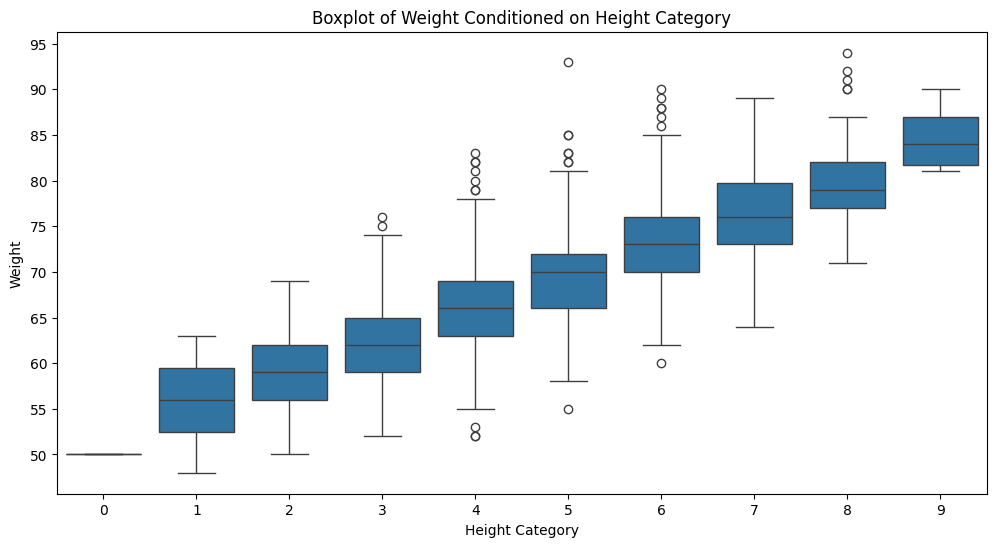

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='height_category', y='weight', data=cyclists_df)
plt.title('Boxplot of Weight Conditioned on Height Category')
plt.xlabel('Height Category')
plt.ylabel('Weight')

# Set y-axis intervals
plt.yticks(np.arange(50, cyclists_df['weight'].max() + 5, 5))

plt.show()

Visualizziamo il numero di ciclisti per ogni categoria che abbiamo definito (escludendo quelli con peso nullo) per valutare se il numero di outlier ottenuti dai boxplot è significativo.

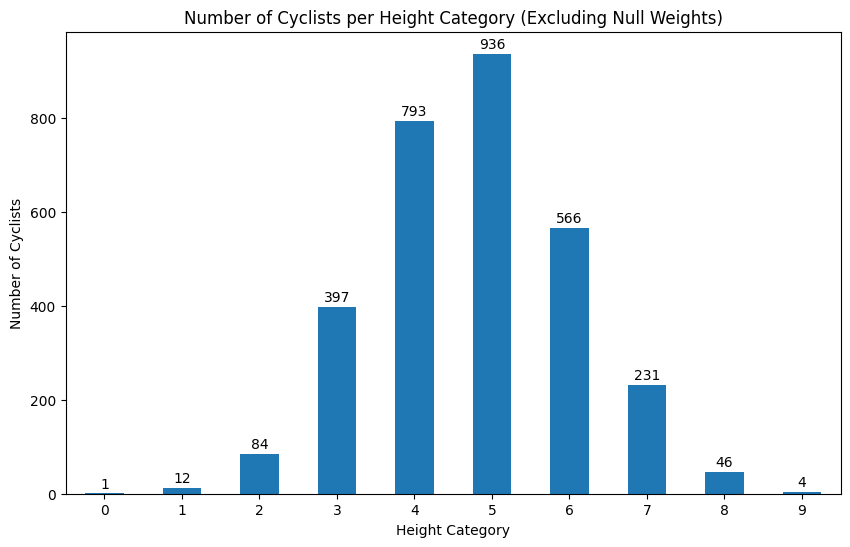

In [ ]:
# Exclude cyclists with null weight
cyclists_df_non_null_weight = cyclists_df[cyclists_df['weight'].notnull()]

# Count the number of cyclists in each height category
height_category_counts = cyclists_df_non_null_weight['height_category'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
ax = height_category_counts.plot(kind='bar')
plt.title('Number of Cyclists per Height Category (Excluding Null Weights)')
plt.xlabel('Height Category')
plt.ylabel('Number of Cyclists')

# Add the count above each bin
for i, count in enumerate(height_category_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()

In [ ]:
import pycountry_convert as pc

# Function to convert country name to continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

# Apply the function to create a new column 'continent'
cyclists_df['continent'] = cyclists_df['nationality'].apply(country_to_continent)

# Display the first few rows to verify
print(cyclists_df[['nationality', 'continent']].head(30))

      nationality      continent
0           Italy         Europe
1          France         Europe
2     Netherlands         Europe
3         Belgium         Europe
4           Spain         Europe
5           Spain         Europe
6         Belgium         Europe
7   United States  North America
8     Netherlands         Europe
9             NaN        Unknown
10         Norway         Europe
11          Spain         Europe
12          Italy         Europe
13         Russia         Europe
14          Italy         Europe
15         France         Europe
16          Spain         Europe
17         France         Europe
18         France         Europe
19         Poland         Europe
20    Netherlands         Europe
21         France         Europe
22         France         Europe
23        Germany         Europe
24    Netherlands         Europe
25      Australia        Oceania
26         France         Europe
27  United States  North America
28          Italy         Europe
29    Swit

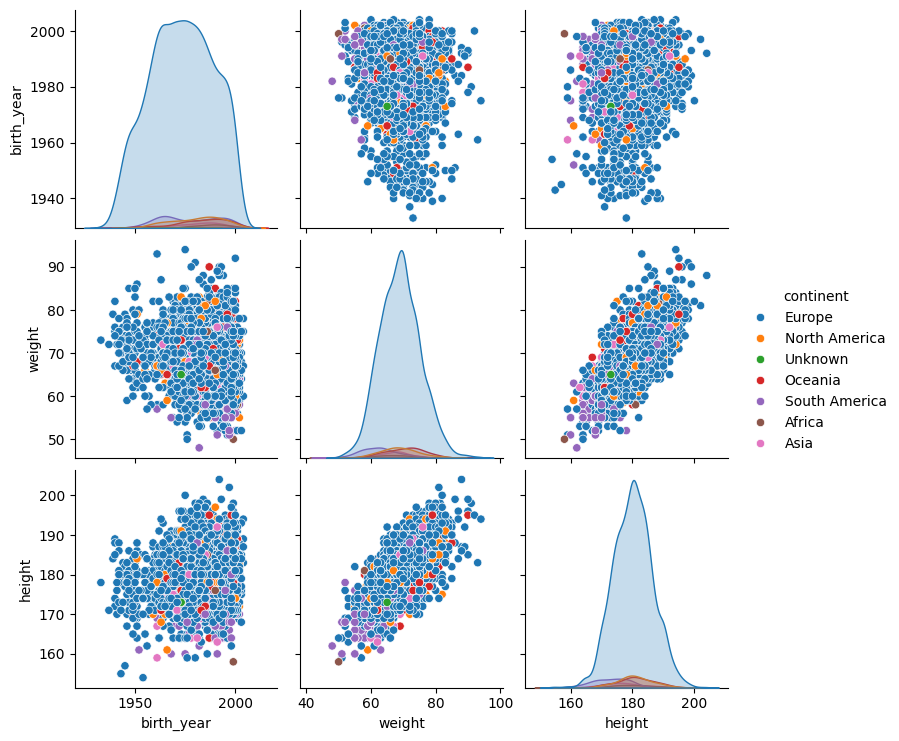

In [ ]:
# Create a pairplot excluding the 'height_category' column
sns.pairplot(cyclists_df.drop(columns=['height_category']), hue='continent')
plt.show()